# Bounding box

In [2]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import cv2

In [3]:
def draw_rect(im, cords, color = None):
    """Draw the rectangle on the image
    
    Parameters
    ----------
    
    im : numpy.ndarray
        numpy image 
    
    cords: numpy.ndarray
        Numpy array containing bounding boxes of shape `N X 4` where N is the 
        number of bounding boxes and the bounding boxes are represented in the
        format `x1 y1 x2 y2`
        
    Returns
    -------
    
    numpy.ndarray
        numpy image with bounding boxes drawn on it
        
    """
    
    im = im.copy()
    
    cords = cords.reshape(-1,4)
    if not color:
        color = [255,255,255]
    for cord in cords:
        
        pt1, pt2 = (cord[0], cord[1]) , (cord[2], cord[3])
                
        pt1 = int(pt1[0]), int(pt1[1])
        pt2 = int(pt2[0]), int(pt2[1])
    
        im = cv2.rectangle(im.copy(), pt1, pt2, color, int(max(im.shape[:2])/200))
    return im

In [4]:
# load CSV with bounding boxes
train_df = pd.read_csv("../data/train.csv")
train_df.head(1)

,Img_Name,Top,Left,Width,Height,Label
0,02-25 13.26.44.jpg,131,1687,163,163,Speed Limit 80


In [5]:
# open first file
file = train_df.Img_Name[0]
image = imread("../data/train/%s" % file)
image.shape

(1080, 1920, 3)

In [17]:
# grab first bounding box
given = train_df[ train_df['Img_Name'] == file].loc[0].values[1:-1]
left   = given[1]
top    = given[0]
width  = given[2]
height = given[3]
right = (image.shape[0] + width) 
lower = (image.shape[1] -height)

In [19]:
print (left, top, right, lower)

1687 131 917 1757


In [23]:
box = np.array([left,top,right,lower])
box

array([1687,  131,  917, 1757])

In [21]:
box = np.array([100,100,500,300])
box

array([100, 100, 500, 300])

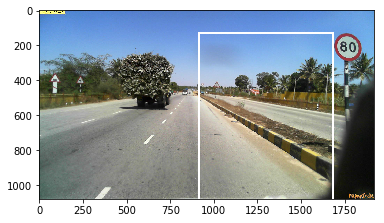

In [24]:
# plot
plt.imshow(draw_rect(image,box))

In [152]:
given[3]

163